# Imports

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [82]:
# Import the dataset
df = pd.read_csv('data/kickstarter_projects.csv', parse_dates=['Launched','Deadline'])

# EDA

In [84]:
df.head(15)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [7]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [14]:
# display number of missing values per column
df.isna().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [ ]:
# Check for duplicaters
df.duplicated().value_counts()

False    374853
Name: count, dtype: int64

In [13]:
# check data types in data frame
df.dtypes

ID              int64
Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

- Launched & Deadline könnten in Date umgewandelt werden?

- df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y/%m/%d')

- Wir könnten das später in Bins machen?

In [ ]:
# Check all the Categorys we have
df.Category.unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

In [22]:
# Check all the Subcategorya we have
df.Subcategory.unique()

array(['Fashion', 'Shorts', 'Illustration', 'Software', 'Journalism',
       'Fiction', 'Theater', 'Rock', 'Photography', 'Puzzles',
       'Graphic Design', 'Film & Video', 'Publishing', 'Documentary',
       'Sculpture', 'Electronic Music', 'Nonfiction', 'Food', 'Painting',
       'Indie Rock', 'Video Games', 'Public Art', 'Product Design', 'Art',
       "Children's Books", 'Crafts', 'Jazz', 'Music', 'Comics',
       'Narrative Film', 'Tabletop Games', 'Digital Art', 'Animation',
       'Conceptual Art', 'Pop', 'Hip-Hop', 'Country & Folk',
       'Periodicals', 'Webseries', 'Performance Art', 'Technology',
       'Art Books', 'World Music', 'Knitting', 'Classical Music',
       'Poetry', 'Graphic Novels', 'Radio & Podcasts', 'Design',
       'Hardware', 'Webcomics', 'Dance', 'Translations', 'Crochet',
       'Games', 'Photo', 'Mixed Media', 'Space Exploration', 'Photobooks',
       'Musical', 'Audio', 'Community Gardens', 'R&B',
       'Fabrication Tools', 'Textiles', 'Architecture',

In [ ]:
# Number of Subcategorys
len(df.Subcategory.unique())


159

In [ ]:
# Check all the Countrys we have
df.Country.unique()

array(['United States', 'United Kingdom', 'Canada', 'Australia',
       'New Zealand', 'Netherlands ', 'Sweden', 'Denmark', 'Norway',
       'Ireland', 'Germany', 'France', 'Spain', 'Belgium', 'Italy',
       'Switzerland', 'Austria', 'Luxembourg', 'Singapore', 'Hong Kong',
       'Mexico', 'Japan'], dtype=object)

In [26]:
# Check all the Subcategorya we have
df.State.unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

## Visualize some Data

<Axes: xlabel='State', ylabel='count'>

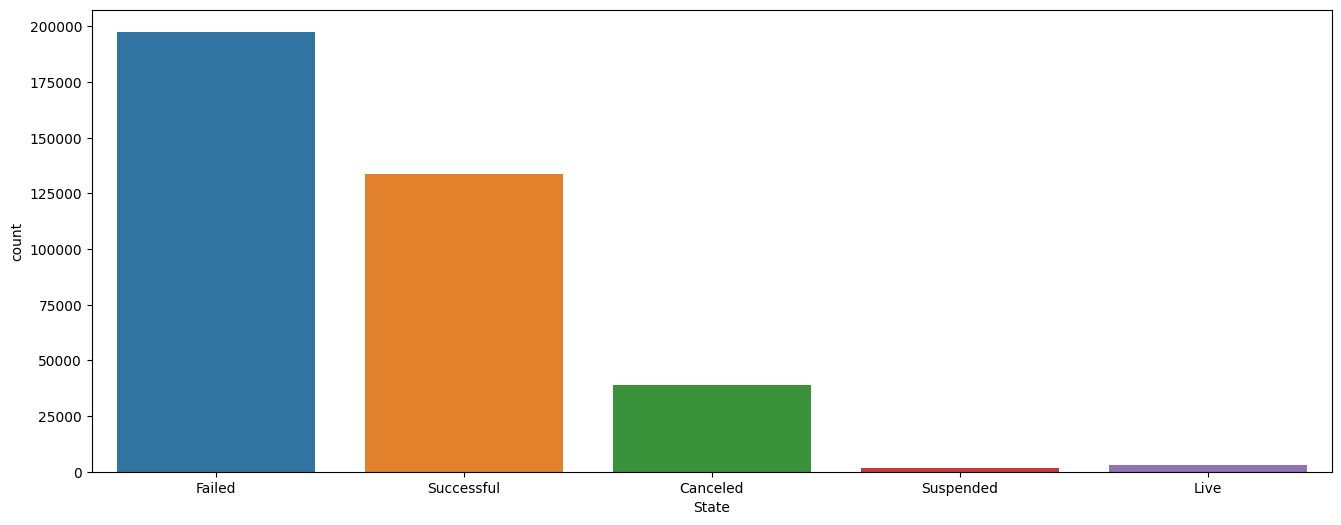

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x="State")

<Axes: xlabel='Category', ylabel='count'>

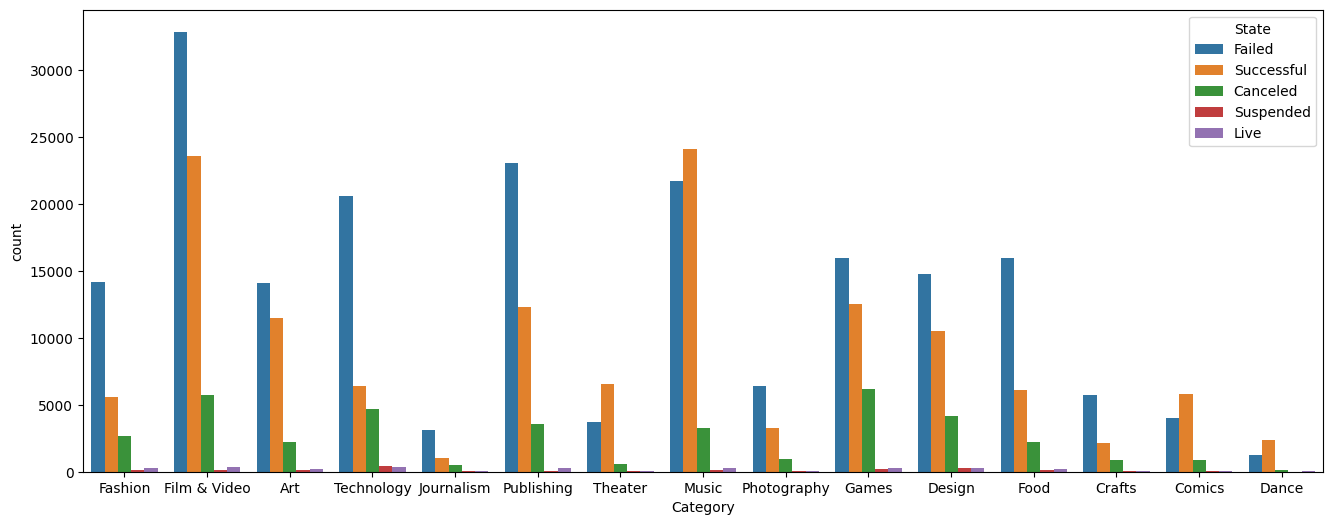

In [152]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x="Category", hue="State")

<Axes: xlabel='Category', ylabel='Goal'>

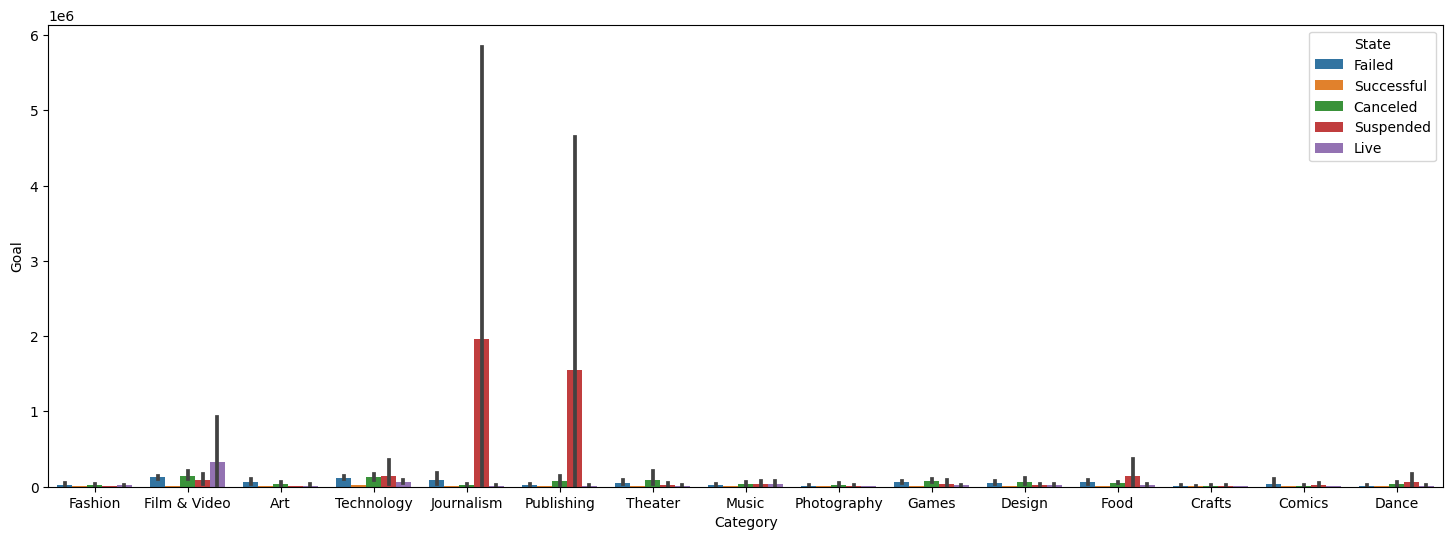

In [129]:
plt.figure(figsize=(18,6))
sns.barplot(data= df, x="Category", y='Goal', hue="State")

In [133]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


<Axes: xlabel='Category', ylabel='Goal'>

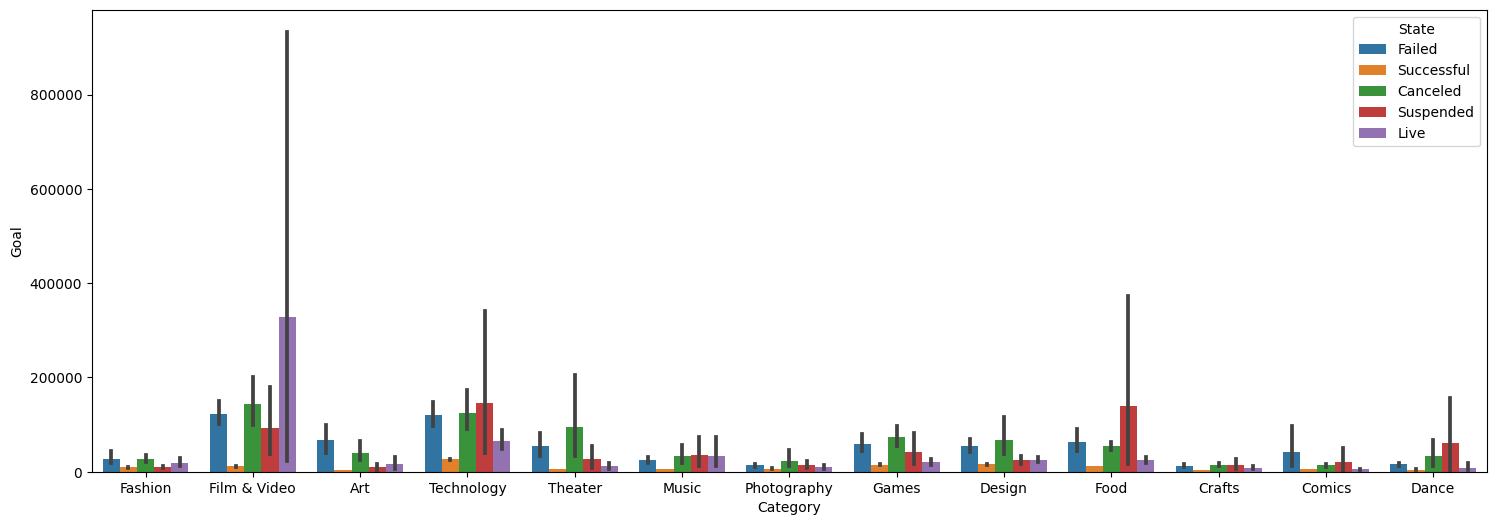

In [136]:
plt.figure(figsize=(18,6))
sns.barplot(data= df[(df.Category != 'Journalism') &(df.Category != 'Publishing') ], x="Category", y='Goal', hue="State")

<Axes: xlabel='Category', ylabel='Goal'>

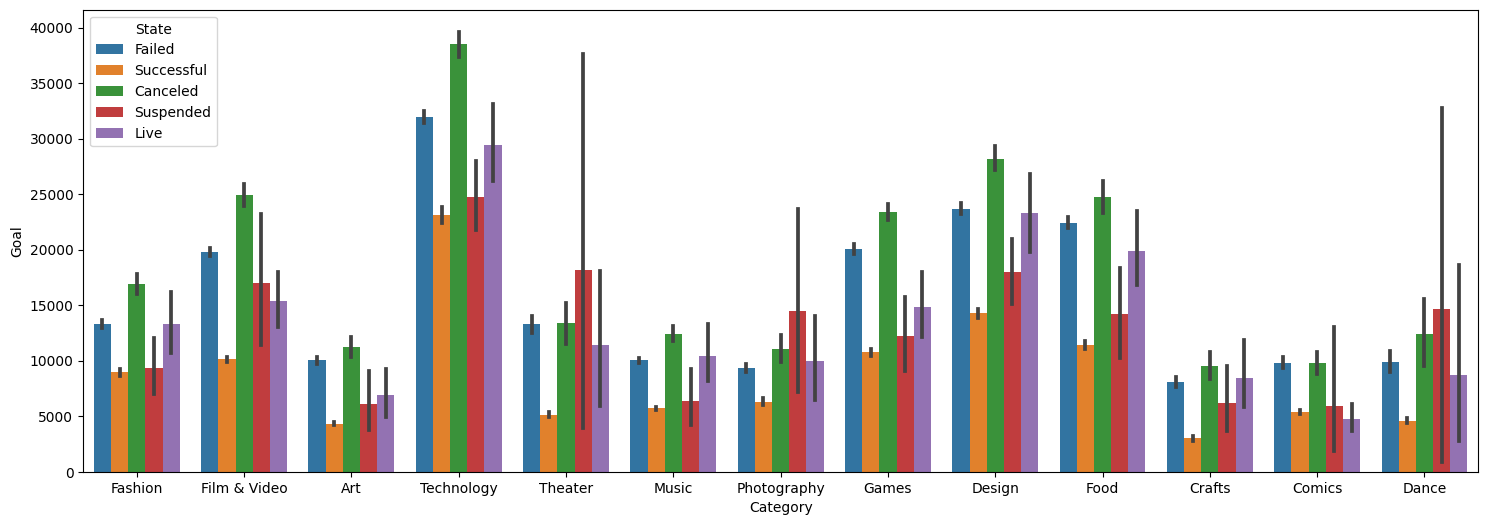

In [139]:
plt.figure(figsize=(18,6))
sns.barplot(data= df[(df.Category != 'Journalism') &(df.Category != 'Publishing') &(df.Goal < 200000)], x="Category", y='Goal', hue="State")

In [ ]:
df[df.State == 'Successful']['Goal'].describe().apply(lambda x: format(x, 'f'))

count     133851.000000
mean        9535.703177
std        27967.078582
min            0.000000
25%         1300.000000
50%         3840.000000
75%        10000.000000
max      2015609.000000
Name: Goal, dtype: object

In [154]:
df[df.State == 'Successful']['Goal'].median()

3840.0

In [147]:
df[(df.State == 'Successful') & (df.Category != 'Technology')]['Goal'].describe().apply(lambda x: format(x, 'f'))

count     127418.000000
mean        8691.370175
std        26460.675115
min            0.000000
25%         1250.000000
50%         3500.000000
75%         9500.000000
max      2015609.000000
Name: Goal, dtype: object

In [155]:
df[(df.State == 'Successful') & (df.Category != 'Technology')]['Goal'].median()


3500.0

In [158]:
df[(df.State == 'Successful')]['Goal'].median()

3840.0

In [153]:
df[(df.State == 'Failed') & (df.Category != 'Technology')]['Goal'].describe().apply(lambda x: format(x, 'f'))

count       176998.000000
mean         56533.201680
std        1383980.727028
min              0.000000
25%           2500.000000
50%           6500.000000
75%          19132.000000
max      166361391.000000
Name: Goal, dtype: object

In [156]:
df[(df.State == 'Failed') & (df.Category != 'Technology')]['Goal'].median()

6500.0

In [157]:
df[(df.State == 'Failed')]['Goal'].median()

7500.0

<Axes: xlabel='Country', ylabel='count'>

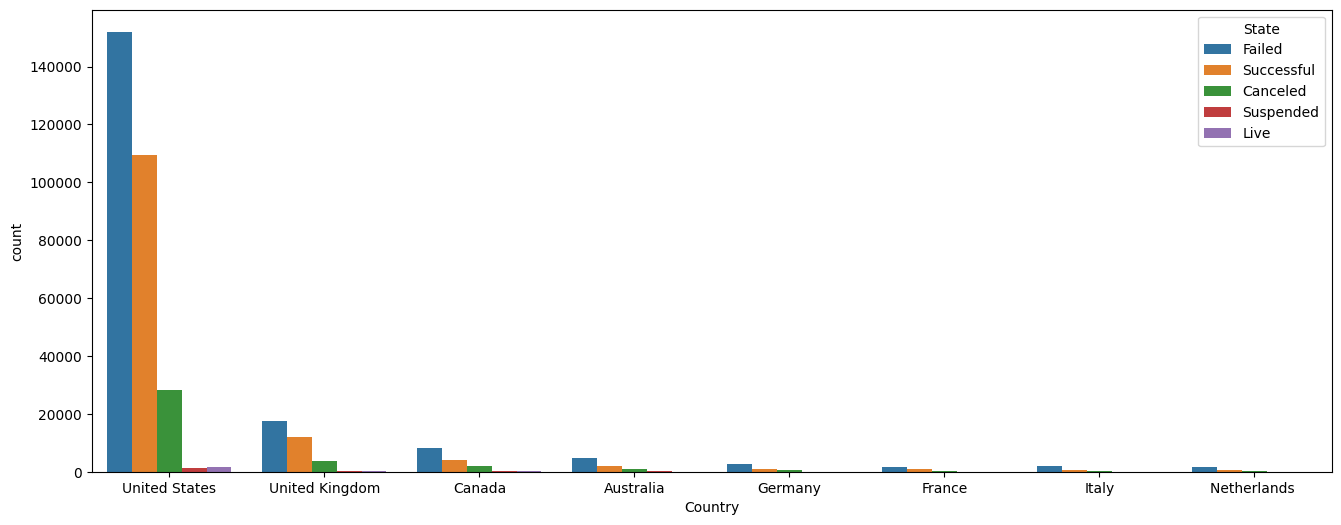

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x="Country", hue="State", order=df.Country.value_counts().iloc[:8].index)

- so we see that most projects come from the USA & UK

In [39]:
df.Goal.describe().apply(lambda x: format(x, 'f'))

count       374853.000000
mean         45863.784796
std        1158778.178742
min              0.000000
25%           2000.000000
50%           5500.000000
75%          16000.000000
max      166361391.000000
Name: Goal, dtype: object

In [44]:
df_live = df[df.State == 'Live']

In [50]:
df_live.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
300290,79946509,Omnicharge: Smart & Compact Portable Power Bank,Technology,Gadgets,United States,2016-07-25 23:57:23,2016-08-08,8000,7035,55,Live
323344,619709625,Escapsim,Film & Video,Film & Video,United States,2017-01-07 21:54:19,2017-02-16,5000,30,3,Live
333955,1100111323,DAWSON HOLLOW,Music,Indie Rock,United States,2017-03-17 18:06:01,2017-04-20,40000,20,1,Live
352082,237278551,Flyboard Air®,Technology,Technology,Belgium,2017-07-16 14:56:18,2017-08-15,293500,610,2,Live
364623,1225234610,The Hali Erickson Project,Music,Pop,United States,2017-10-13 21:32:39,2017-11-12,3000,320,9,Live


In [46]:
df_live.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2798 entries, 300290 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2798 non-null   int64 
 1   Name         2798 non-null   object
 2   Category     2798 non-null   object
 3   Subcategory  2798 non-null   object
 4   Country      2798 non-null   object
 5   Launched     2798 non-null   object
 6   Deadline     2798 non-null   object
 7   Goal         2798 non-null   int64 
 8   Pledged      2798 non-null   int64 
 9   Backers      2798 non-null   int64 
 10  State        2798 non-null   object
dtypes: int64(4), object(7)
memory usage: 326.9+ KB


In [58]:
df_live.describe()

,ID,Goal,Pledged,Backers
count,2.798000e+03,2.798000e+03,2798.000000,2798.000000
mean,1.084319e+09,6.254870e+04,5871.259471,68.124017
std,6.124402e+08,1.875803e+06,31435.991055,382.621884
min,5.113750e+05,1.000000e+00,0.000000,0.000000
25%,5.751839e+08,2.049250e+03,10.000000,1.000000
50%,1.074813e+09,6.523500e+03,259.500000,5.000000
75%,1.610885e+09,1.846925e+04,1798.500000,26.000000
max,2.146469e+09,9.900000e+07,724424.000000,10748.000000


In [75]:
df_suc_fail = df[(df.State == 'Successful') | (df.State == 'Failed')]

In [76]:
df_suc_fail

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful


<Figure size 1200x600 with 0 Axes>

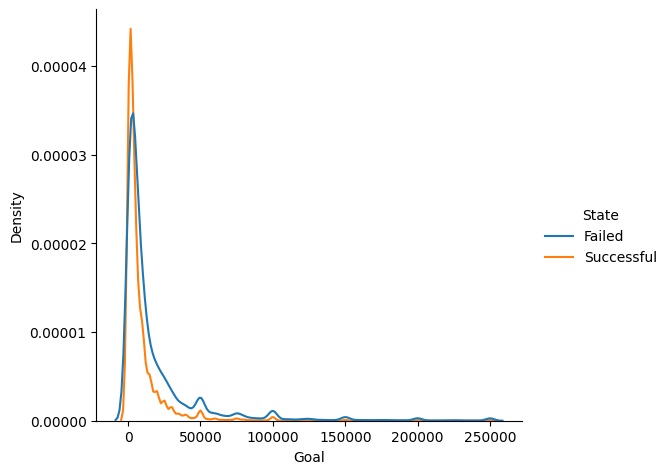

In [78]:
plt.figure(figsize=(12,6))
sns.displot(df_suc_fail[df_suc_fail.Goal <= 250000], x="Goal", hue = 'State', kind="kde")
plt.ticklabel_format(style='plain')


<Figure size 1200x600 with 0 Axes>

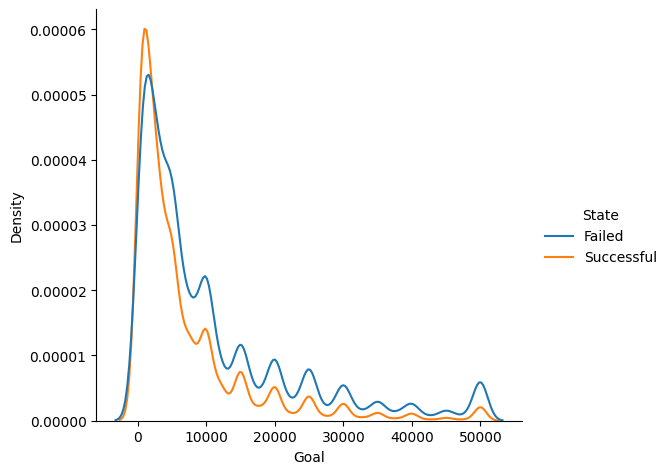

In [80]:
plt.figure(figsize=(12,6))
sns.displot(df_suc_fail[df_suc_fail.Goal <= 50000], x="Goal", hue = 'State', kind="kde")
plt.ticklabel_format(style='plain')

<Figure size 1200x600 with 0 Axes>

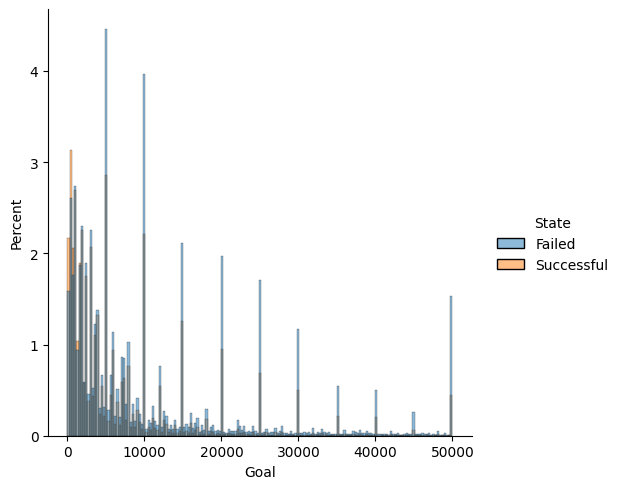

In [141]:
plt.figure(figsize=(12,6))
sns.displot(df_suc_fail[df_suc_fail.Goal <= 50000], x="Goal", hue = 'State',stat='percent')
plt.ticklabel_format(style='plain')

- So the takeaway is, that we have highly imbalanced Data. 
- So a decidion tree might be good?

In [87]:
df_time_range = df.copy()
df_time_range.eval('TimeRange = Deadline - Launched ', inplace = True)

In [106]:
df_time_range.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,TimeRange
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,40 days
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,88 days
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,9 days
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,80 days
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,29 days


In [ ]:
sns.catplot(x="Category", col='education_level', data=df, hue='State', kind="count", col_wrap=4);

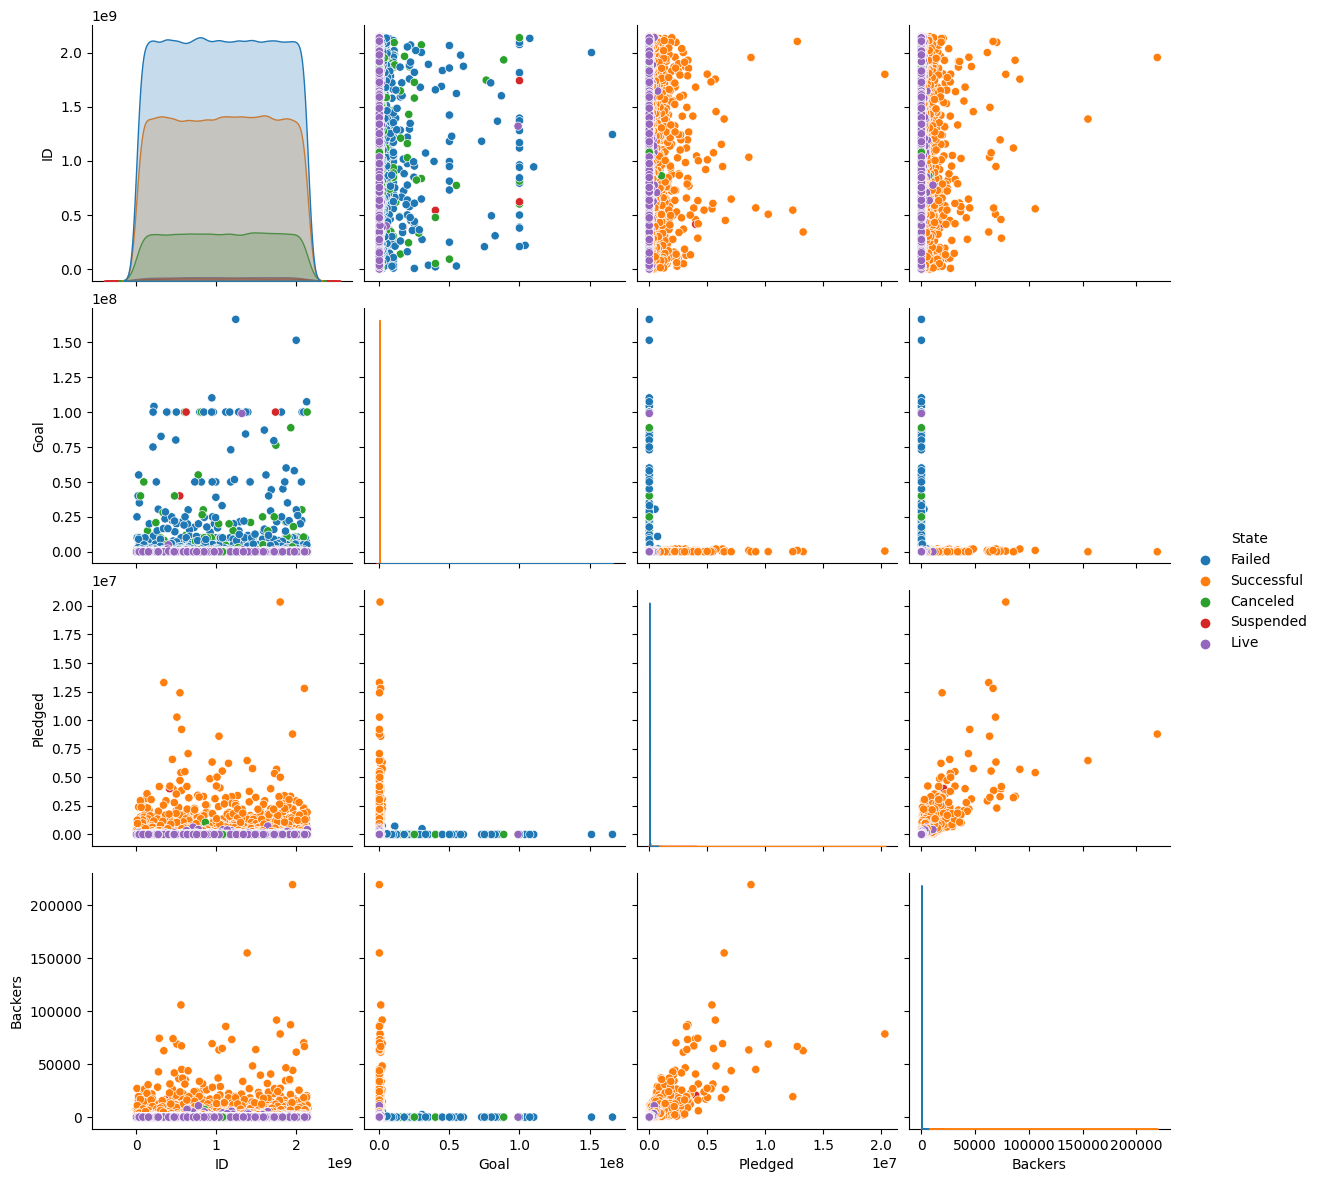

In [123]:
sns.pairplot(df, hue="State", height=3);

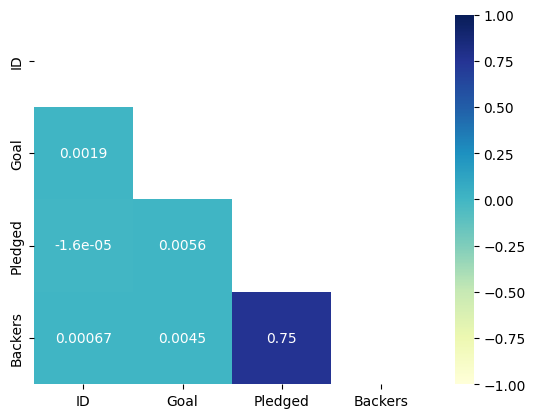

In [124]:
# Correlation heatmap 
correlations = df.corr(numeric_only=True)
mask = np.triu(correlations)
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");

# Data cleaningin and feature engineering

In [97]:
# Change the date format
df_cleaned = df.copy()

# Remove hours from Launch-Time
df_cleaned['Launched'] = pd.to_datetime(df_cleaned['Launched']).dt.date
df_cleaned['Launched'] = pd.to_datetime(df_cleaned['Launched'], format='%Y/%m/%d')


In [99]:
df_cleaned.head(3)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful


In [100]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


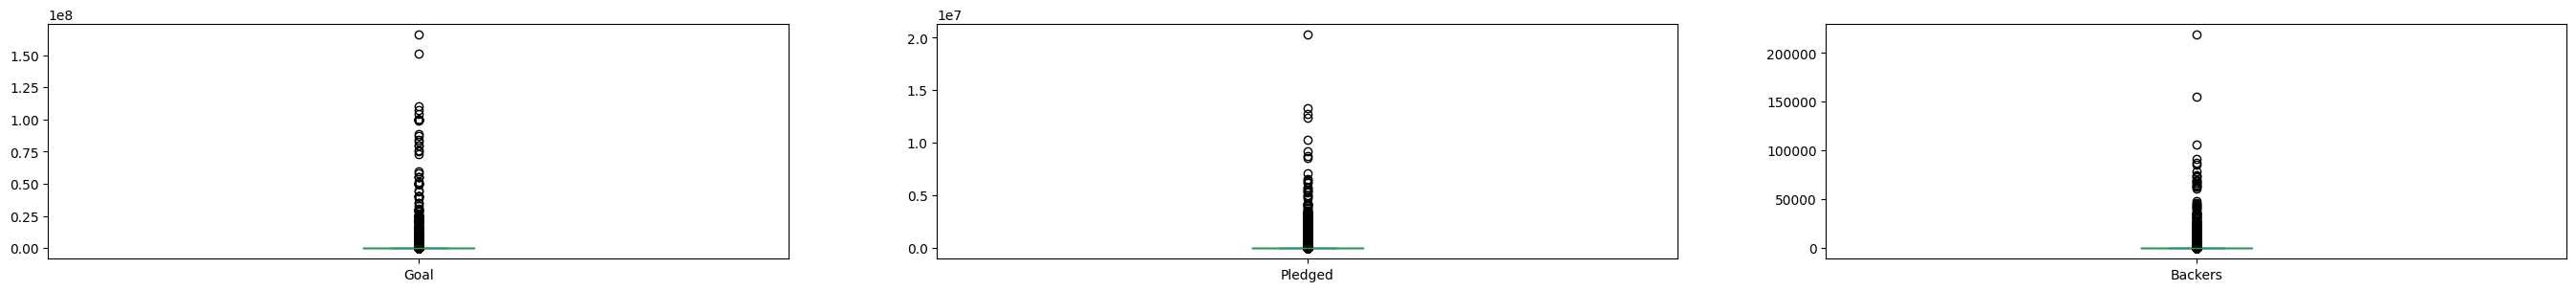

In [ ]:
# Checking for Outliers
df_outliers = df[['Goal', 'Pledged', 'Backers']].copy()

df_outliers.plot(kind='box', subplots=True, layout=(8,3), figsize=(34,30))
plt.show() #

# Feature engineering


In [101]:
df_time_range = df_cleaned.copy()
df_time_range.eval('TimeRange = Deadline - Launched ', inplace = True)

In [104]:
df_time_range.TimeRange.describe()

count                        374853
mean     34 days 05:12:43.067122312
std      12 days 19:18:54.652879778
min                 1 days 00:00:00
25%                30 days 00:00:00
50%                30 days 00:00:00
75%                37 days 00:00:00
max                92 days 00:00:00
Name: TimeRange, dtype: object

In [113]:
# We crewate bins based on how long the last renovation was made
bins = np.arange(0, 110, 10)
df_time_range_bins = df_time_range.copy()
df_time_range_bins
df_series = pd.cut(df_time_range_bins.TimeRange.dt.days, bins=bins)
df_series.name = 'TimeRange_bins'
df_time_range_bins = pd.concat([df_time_range_bins, df_series], axis=1)

<Axes: xlabel='TimeRange_bins', ylabel='count'>

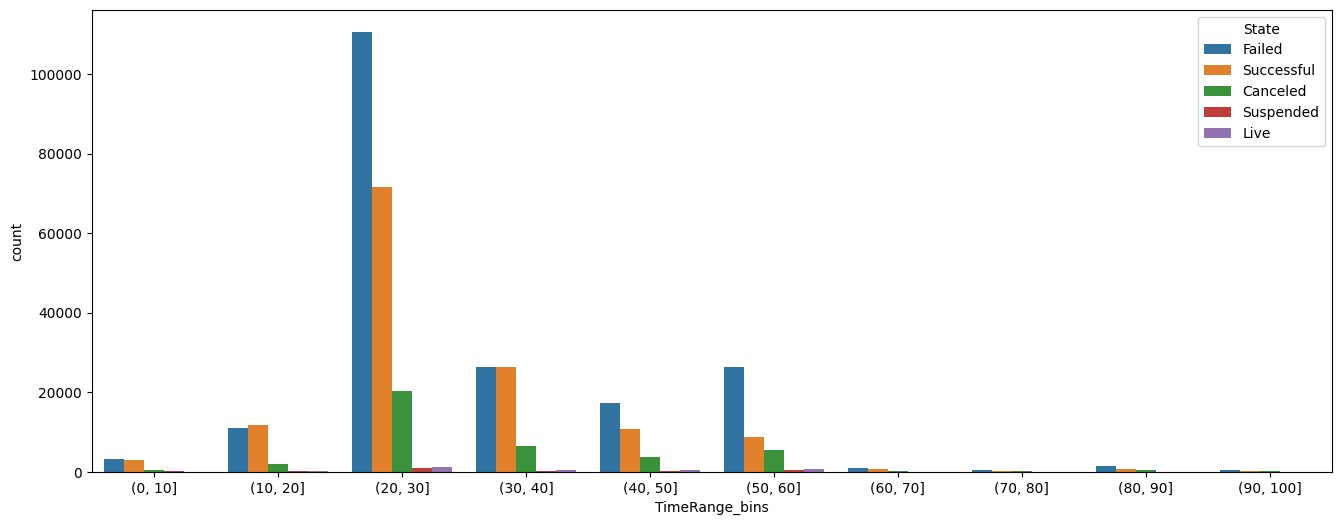

In [115]:
plt.figure(figsize=(16,6))
sns.countplot(data=df_time_range_bins, x="TimeRange_bins", hue="State")

In [5]:
coffee_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

In [6]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [10]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [11]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [12]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [13]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [15]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [17]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [18]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [19]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
